# Logistic regression with Python

For this lesson, we will be working with the [Kaggle Titanic Data Set] (https://www.kaggle.com/c/titanic). This is a very famous data set and is often the first step in Machine Learning!

We will try to assemble a surviving or deceased classification algorithm using Python logistic regression.

We'll use a "semi-clean" version of the Titanic dataset. If you use the dataset hosted directly on Kaggle, you might need to do an additional cleanup not shown on this notebook.

## Importing Libraries
Let's import some libraries to get you started!

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#statistical data visualization and pert of matlap 
import seaborn as sns
%matplotlib inline

In [118]:
train = pd.read_csv('titanic_train.csv')
X = train.iloc[:, :-1].values
y = train.iloc[:, -1].values

In [119]:
# splitting data into train set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [120]:
print(X_train)

[[106 0 3 ... '349207' 7.8958 nan]
 [69 1 3 ... '3101281' 7.925 nan]
 [254 0 3 ... 'A/5. 3336' 16.1 nan]
 ...
 [630 0 3 ... '334912' 7.7333 nan]
 [560 1 3 ... '345572' 17.4 nan]
 [685 0 2 ... '29750' 39.0 nan]]


In [121]:
print( y_train)

['S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'C'
 'S' 'S' 'S' 'S' 'C' 'Q' 'S' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'Q' 'S' 'S'
 'Q' 'S' 'C' 'C' 'S' 'Q' 'C' 'S' 'C' 'S' 'C' 'S' 'S' 'C' 'S' 'C' 'S' 'S'
 'S' 'Q' 'S' 'S' 'Q' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'C' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'Q' 'S' 'S' 'S' 'S' 'S' 'Q' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'Q' 'C' 'S' 'S' 'Q' 'S' 'S' 'C' 'S' 'S'
 'S' 'S' 'S' 'Q' 'S' 'C' 'S' 'C' 'S' 'S' 'C' 'S' 'S' 'S' 'C' 'S' 'S' 'S'
 'S' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S'
 'S' 'S' 'C' 'S' 'Q' 'S' 'Q' 'S' 'S' 'C' 'S' 'S' 'S' 'Q' 'S' 'Q' 'S' 'S'
 'S' 'C' 'S' 'Q' 'S' 'Q' 'C' 'Q' 'S' 'C' 'S' 'S' 'S' 'S' 'C' 'S' 'C' 'S'
 'C' 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'C' 'C' 'C' 'S'
 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'Q' 'Q' 'S' 'C' 'S' 'S' 'S' 'Q' 'S' 'S'
 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'S' 'C' 'C' 'S' 'S'
 'C' 'C' 'S' 'S' 'S' 'S' 'C' 'S' 'S' 'S' 'S' 'S' 'S

In [122]:
print(X_test)

[[496 0 3 ... '2627' 14.4583 nan]
 [649 0 3 ... 'S.O./P.P. 751' 7.55 nan]
 [279 0 3 ... '382652' 29.125 nan]
 ...
 [380 0 3 ... '347069' 7.775 nan]
 [743 1 1 ... 'PC 17608' 262.375 'B57 B59 B63 B66']
 [11 1 3 ... 'PP 9549' 16.7 'G6']]


In [123]:
print(Y_train)

766    0
441    0
294    0
461    0
288    1
163    0
160    0
847    0
642    0
606    0
295    0
586    0
818    0
311    1
404    0
257    1
337    1
809    1
511    0
214    0
736    0
327    1
748    0
817    0
372    0
469    1
476    0
299    1
776    0
106    1
      ..
121    0
388    0
728    0
137    0
434    0
381    1
90     0
233    1
779    1
403    0
699    0
130    0
309    1
62     0
57     0
53     1
720    1
22     1
538    0
27     0
658    0
291    1
580    1
356    1
536    0
109    1
640    0
874    1
270    0
692    1
Name: Survived, Length: 622, dtype: int64


In [66]:
# (Embarked) arrangement of class aboard Ship
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [67]:
#check for null values and n_columns 
train.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [115]:
train.isnull().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
male        0
Q           0
S           0
dtype: int64

In [116]:
print('Percent of missing "Age" records is %.2f%%' %((train['Age'].isnull().sum()/train.shape[0])*100))

Percent of missing "Age" records is 0.00%


In [124]:
# percent of missing "Cabin" 
print('Percent of missing "Cabin" records is %.2f%%' %((train['Cabin'].isnull().sum()/train.shape[0])*100))
# out of our discssion

Percent of missing "Cabin" records is 77.10%


In [126]:
# percent of missing "Embarked" 
print('Percent of missing "Embarked" records is %.2f%%' %((train['Embarked'].isnull().sum()/train.shape[0])*100))

Percent of missing "Embarked" records is 0.22%


Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):
S    644
C    168
Q     77
Name: Embarked, dtype: int64


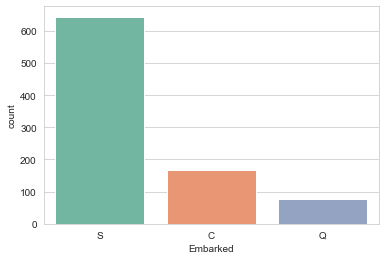

In [127]:
print('Boarded passengers grouped by port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(train['Embarked'].value_counts())
sns.countplot(x='Embarked', data=train, palette='Set2')
plt.show()

In [128]:
print('The most common boarding port of embarkation is %s.' %train['Embarked'].value_counts().idxmax())

The most common boarding port of embarkation is S.


In [ ]:
train_data = train_df.copy()
train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

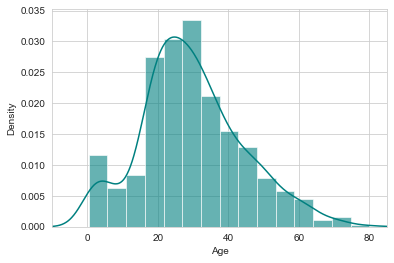

In [70]:
# for Explanation more 
ax = train["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [71]:
train.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [72]:
train.corr()

PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000

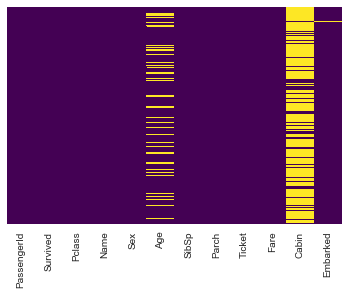

In [73]:
#
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [74]:
sns.set_style('whitegrid')

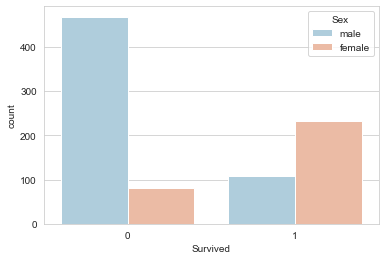

In [75]:
sns.countplot(x='Survived', data=train, hue='Sex', palette='RdBu_r')

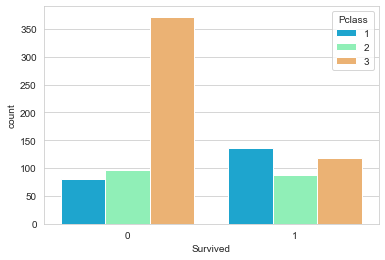

In [76]:
sns.countplot(x='Survived', data=train, hue='Pclass', palette='rainbow')

In [134]:
train_data = train.copy()
train_data["Age"].fillna(train["Age"].median(skipna=True), inplace=True)
train_data["Embarked"].fillna(train['Embarked'].value_counts().idxmax(), inplace=True)
train_data.drop('Cabin', axis=1, inplace=True)

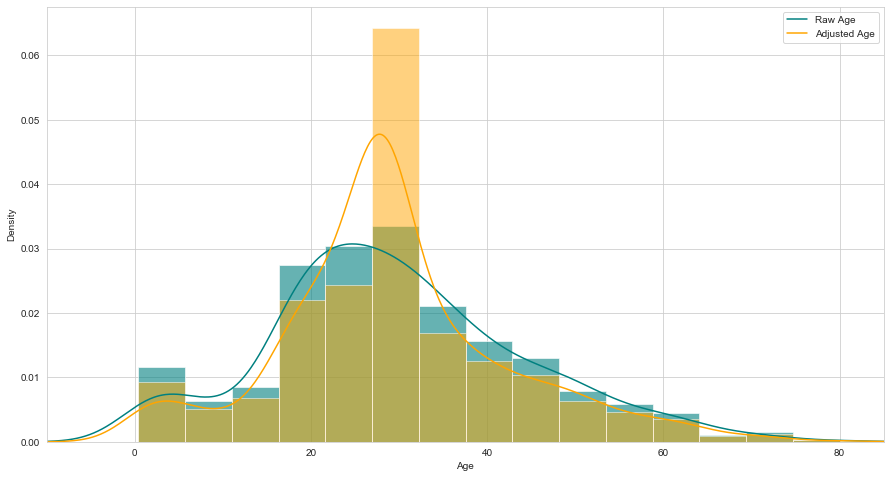

In [135]:
plt.figure(figsize=(15,8))
ax = train["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train["Age"].plot(kind='density', color='teal')
ax = train_data["Age"].hist(bins=15, density=True, stacked=True, color='orange', alpha=0.5)
train_data["Age"].plot(kind='density', color='orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [77]:
train['Age'].head()

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

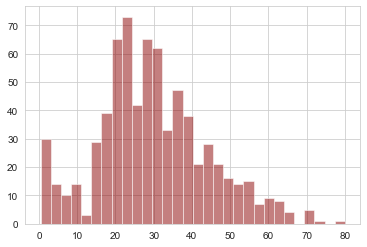

In [78]:
train['Age'].hist(bins=30, color='darkred', alpha=0.5)

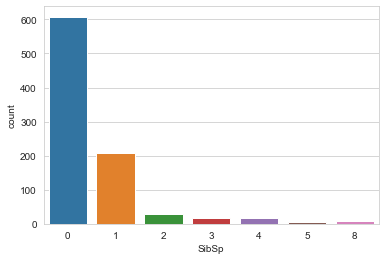

In [79]:
sns. countplot(x='SibSp', data=train)

In [80]:
train[train['SibSp'] == 0]['Age'].hist(bins=30)

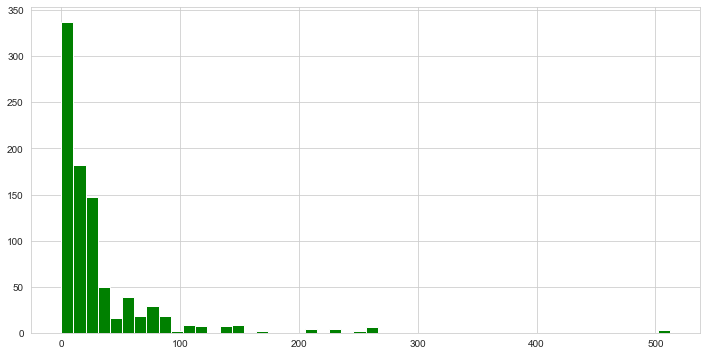

In [81]:
# Price of ticket 
train['Fare'].hist(color='g', bins=50, figsize=(12, 6))

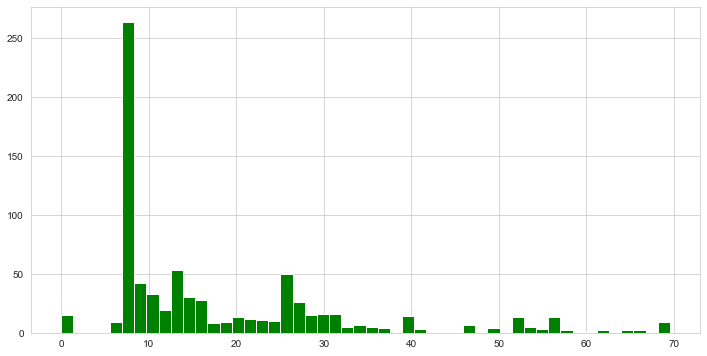

In [82]:
train[train['Fare']<70]['Fare'].hist(color='g', bins=50, figsize=(12, 6))

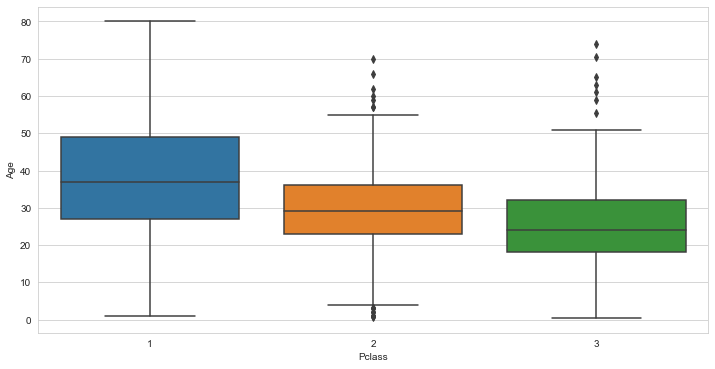

In [83]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Pclass', y='Age', data=train)

In [84]:
# function of imputing missing data on age

In [117]:
def inputar_idade(cols):
    Idade = cols[0]
    Classe = cols[1]
    
    if pd.isnull(Idade):
        if Classe == 1:
            return 37
        elif Classe == 2:
            return 29
        else:
            return 24
    else:
        return Idade

In [86]:
train['Age'] = train[['Age', 'Pclass']].apply(inputar_idade, axis=1)

In [87]:
train['Age'].head(20)

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5     24.0
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
17    29.0
18    31.0
19    24.0
Name: Age, dtype: float64

In [88]:
# check if the data has been filled

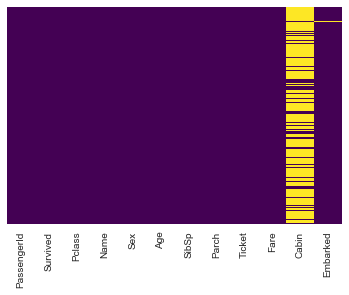

In [89]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [90]:
del train['Cabin']

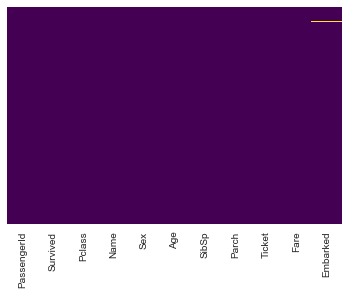

In [91]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [92]:
train.dropna(inplace=True)

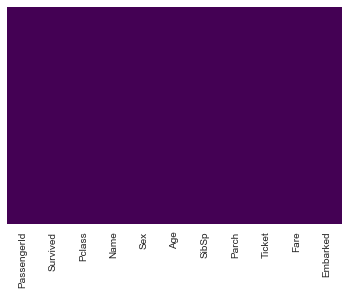

In [93]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [94]:
# no more missing data

In [95]:
pd.get_dummies(train['Sex']).head()

female  male
0       0     1
1       1     0
2       1     0
3       1     0
4       0     1

In [96]:
#   
# one that takes the values 0 or 1 to indicate the absence or presence of some
# categorical effect that may be expected to shift the outcome.
pd.get_dummies(train['Sex'], drop_first=True).head()

male
0     1
1     0
2     0
3     0
4     1

In [97]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [98]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [99]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [100]:
embark.head()

Q  S
0  0  1
1  0  0
2  0  1
3  0  1
4  0  1

In [101]:
train.drop(['Sex', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [102]:
train.head()

Survived  Pclass   Age  SibSp  Parch     Fare Embarked
0         0       3  22.0      1      0   7.2500        S
1         1       1  38.0      1      0  71.2833        C
2         1       3  26.0      0      0   7.9250        S
3         1       1  35.0      1      0  53.1000        S
4         0       3  35.0      0      0   8.0500        S

In [103]:
train = pd.concat([train, sex, embark], axis=1)

In [104]:
del train['Embarked']

In [105]:
train.head(30)

Survived  Pclass   Age  SibSp  Parch      Fare  male  Q  S
0          0       3  22.0      1      0    7.2500     1  0  1
1          1       1  38.0      1      0   71.2833     0  0  0
2          1       3  26.0      0      0    7.9250     0  0  1
3          1       1  35.0      1      0   53.1000     0  0  1
4          0       3  35.0      0      0    8.0500     1  0  1
5          0       3  24.0      0      0    8.4583     1  1  0
6          0       1  54.0      0      0   51.8625     1  0  1
7          0       3   2.0      3      1   21.0750     1  0  1
8          1       3  27.0      0      2   11.1333     0  0  1
9          1       2  14.0      1      0   30.0708     0  0  0
10         1       3   4.0      1      1   16.7000     0  0  1
11         1       1  58.0      0      0   26.5500     0  0  1
12         0       3  20.0      0      0    8.0500     1  0  1
13         0       3  39.0      1      5   31.2750     1  0  1
14         0       3  14.0      0      0    7.8542     0  0  1
15         1       2  55.0      0      0   16.0000     0  0  1
16         0       3   2.0      4      1   29.1250     1  1  0
17         1       2  29.0      0      0   13.0000     1  0  1
18         0       3  31.0      1      0   18.0000     0  0  1
19         1       3  24.0      0      0    7.2250     0  0  0
20         0       2  35.0      0      0   26.0000     1  0  1
21         1       2  34.0      0      0   13.0000     1  0  1
22         1       3  15.0      0      0    8.0292     0  1  0
23         1       1  28.0      0      0   35.5000     1  0  1
24         0       3   8.0      3      1   21.0750     0  0  1
25         1       3  38.0      1      5   31.3875     0  0  1
26         0       3  24.0      0      0    7.2250     1  0  0
27         0       1  19.0      3      2  263.0000     1  0  1
28         1       3  24.0      0      0    7.8792     0  1  0
29         0       3  24.0      0      0    7.8958     1  0  1

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, Y_train, Y_test = train_test_split(train.drop('Survived', axis=1), train['Survived'], test_size=0.3)

In [108]:
from sklearn.linear_model import LogisticRegression

In [109]:
logmodel = LogisticRegression()

In [110]:
logmodel.fit(X_train, Y_train)

C:\Users\lenovo\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [111]:
prediction = logmodel.predict(X_test)

In [112]:
from sklearn.metrics import classification_report

In [113]:
print(classification_report(Y_test, prediction))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       166
           1       0.78      0.72      0.75       101

    accuracy                           0.82       267
   macro avg       0.81      0.80      0.80       267
weighted avg       0.81      0.82      0.82       267



**According to the proposed model, if we obtain the information at the time of shipment to the Titanic, 81% sure that the person would die in the shipwreck.**

In [114]:
from sklearn.metrics import confusion_matrix

In [54]:
print(confusion_matrix(Y_test, prediction))

[[146  26]
 [ 53  42]]
